<a href="https://colab.research.google.com/github/ahmadyadak/Data-sciences-proj-2/blob/main/project_phase_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import re

In [ ]:
df = pd.read_csv('Accident.csv')
df.head()

,Accident Type,Date,Speed (Km),Simple Injuries,Severe Injuries,Death,Medium Injuries,Road Lanes,Road Surfuce Description,Vehicle Country,Driver Licensee Type,Road Type,Light,Weather,Road Proerties,Driver Mistake,Vehicle type,Number of Cars,Driver Age,Sex
0,Collision,2018-01-14 16:35,60,0,0,0,0,Two ways,dry,Jordan,class 3,asphalt,day,clear,flat straight,Improper lane changes,Passengers vehicle (up to 9 seats),2,28,1
1,Collision,2018-01-14 16:35,60,0,0,0,0,Two ways,dry,Jordan,class 3,asphalt,day,clear,flat straight,Violation of traffic rules,Passengers vehicle (up to 9 seats),2,28,3
2,Collision,2018-01-16 19:15,40,0,0,0,0,Two ways,dry,Jordan,class4,asphalt,night with enough light,clear,flat straight,Neglecting traffic safety precautions,Truck,2,39,3
3,Collision,2018-01-16 19:15,40,0,0,0,0,Two ways,dry,Jordan,class 3,asphalt,night with enough light,clear,flat straight,Violation of traffic rules,Passengers vehicle (up to 9 seats),2,42,3
4,Collision,2018-01-17 17:20,100,0,0,0,0,Two ways with median island,dry,Jordan,class4,asphalt,night with enough light,clear,flat straight,Neglecting traffic safety precautions,Passenger and cargo vehicle,2,30,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73095 entries, 0 to 73094
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Accident Type             73095 non-null  object
 1   Date                      73095 non-null  object
 2   Speed (Km)                73095 non-null  int64 
 3   Simple Injuries           73095 non-null  int64 
 4   Severe Injuries           73095 non-null  int64 
 5   Death                     73095 non-null  int64 
 6   Medium Injuries           73095 non-null  int64 
 7   Road Lanes                73095 non-null  object
 8   Road Surfuce Description  73095 non-null  object
 9   Vehicle Country           73095 non-null  object
 10  Driver Licensee Type      73095 non-null  object
 11  Road Type                 73095 non-null  object
 12  Light                     73095 non-null  object
 13  Weather                   73095 non-null  object
 14  Road Proerties        

In [ ]:
 df.describe()

,Speed (Km),Simple Injuries,Severe Injuries,Death,Medium Injuries,Number of Cars,Driver Age,Sex
count,73095.000000,73095.000000,73095.000000,73095.000000,73095.000000,73095.000000,73095.000000,73095.000000
mean,50.060332,0.066612,0.004857,0.002572,0.017922,2.064355,35.497353,2.646747
std,12.005299,0.445188,0.096401,0.057244,0.178484,0.475107,23.094740,0.689262
min,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,2.000000,24.000000,3.000000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000
75%,60.000000,0.000000,0.000000,0.000000,0.000000,2.000000,44.000000,3.000000
max,110.000000,42.000000,7.000000,4.000000,10.000000,9.000000,118.000000,3.000000


In [ ]:
df.isnull().sum()

,0
Accident Type,0
Date,0
Speed (Km),0
Simple Injuries,0
Severe Injuries,0
Death,0
Medium Injuries,0
Road Lanes,0
Road Surfuce Description,0
Vehicle Country,0


In [ ]:
df.nunique()

,0
Accident Type,3
Date,30342
Speed (Km),11
Simple Injuries,13
Severe Injuries,7
Death,5
Medium Injuries,7
Road Lanes,5
Road Surfuce Description,7
Vehicle Country,21


In [ ]:
for col in df.columns:
  print(f"Unique values in '{col}':")
  print(df[col].unique())
  print("\n")

Unique values in 'Accident Type':
['Collision' 'Run over' 'Off-Road']


Unique values in 'Date':
['2018-01-14 16:35' '2018-01-16 19:15' '2018-01-17 17:20' ...
 '2018-11-06 23:58' '2018-11-06 23:45' '2018-11-06 16:18']


Unique values in 'Speed (Km)':
[ 60  40 100  50  80  30  90  20  70  10 110]


Unique values in 'Simple Injuries':
[ 0  1  3  4  2  5  9 42  6  8 10  7 12]


Unique values in 'Severe Injuries':
[0 1 5 2 3 7 4]


Unique values in 'Death':
[0 1 4 2 3]


Unique values in 'Medium Injuries':
[ 0  1  2  4  3  5 10]


Unique values in 'Road Lanes':
['Two ways' 'Two ways with median island' 'One way' 'Parking lot'
 'Public Parks']


Unique values in 'Road Surfuce Description':
['dry' 'wet' 'snow' 'mud' 'freeze' 'sandy' 'oily']


Unique values in 'Vehicle Country':
['Jordan' 'KSA' 'Kuwait' 'Oman' 'Qatar' 'UAE' 'Egypt' 'Iraq' 'Libya'
 'Bahhrin' 'UK' 'Israel' 'Sudan' 'Canada' 'Lebanon' 'Germany' 'Syria'
 'Yemen' 'Tunisia' 'Swizerland' 'Jordan temp']


Unique values in 'Driver Lice

In [ ]:
print(df.shape[1])
print(df.columns)

20
Index(['Accident Type', 'Date', 'Speed (Km)', 'Simple Injuries',
       'Severe Injuries', 'Death', 'Medium Injuries', 'Road Lanes',
       'Road Surfuce Description', 'Vehicle Country', 'Driver Licensee Type',
       'Road Type', 'Light', 'Weather', 'Road Proerties', 'Driver Mistake',
       'Vehicle type', 'Number of Cars', 'Driver Age', 'Sex'],
      dtype='object')


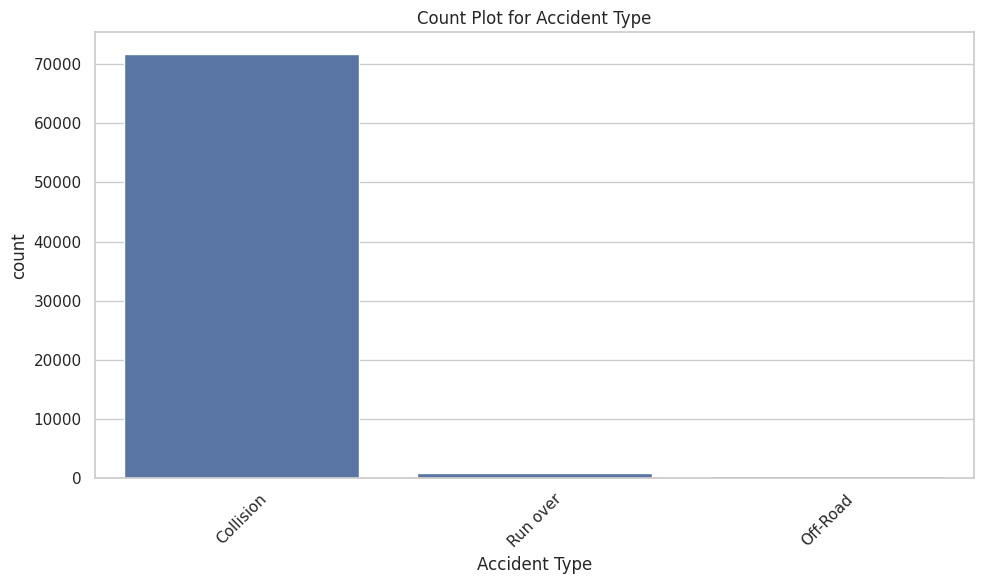

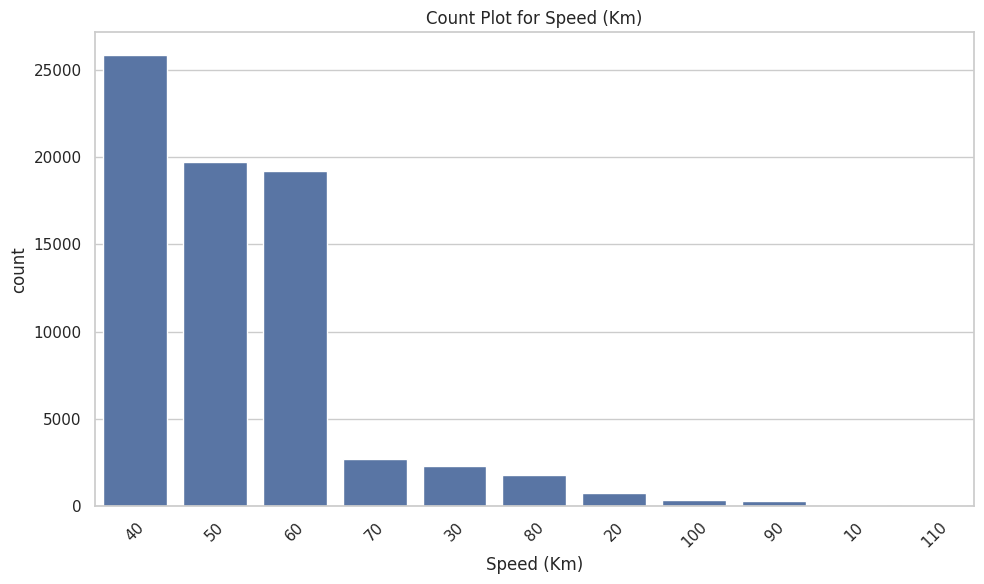

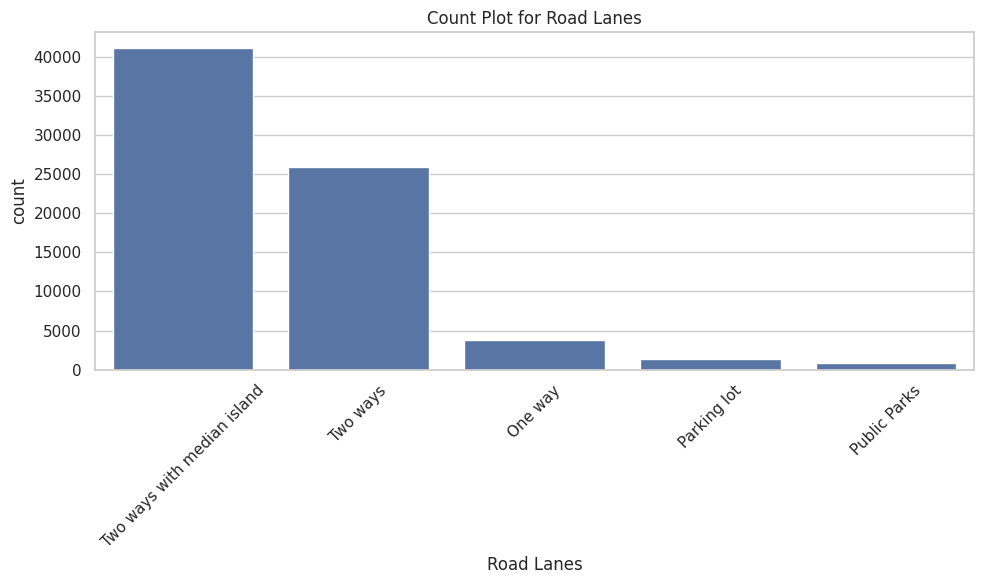

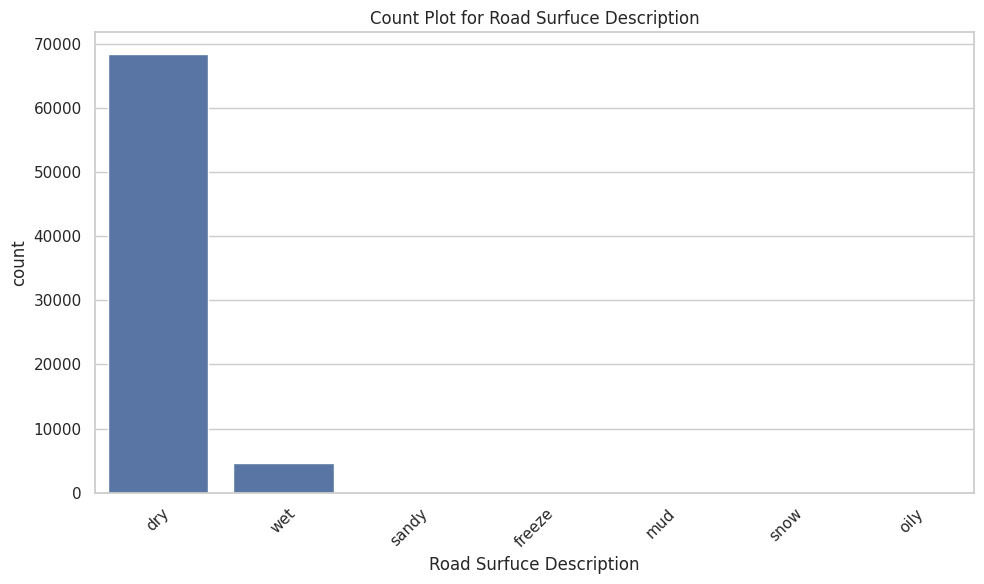

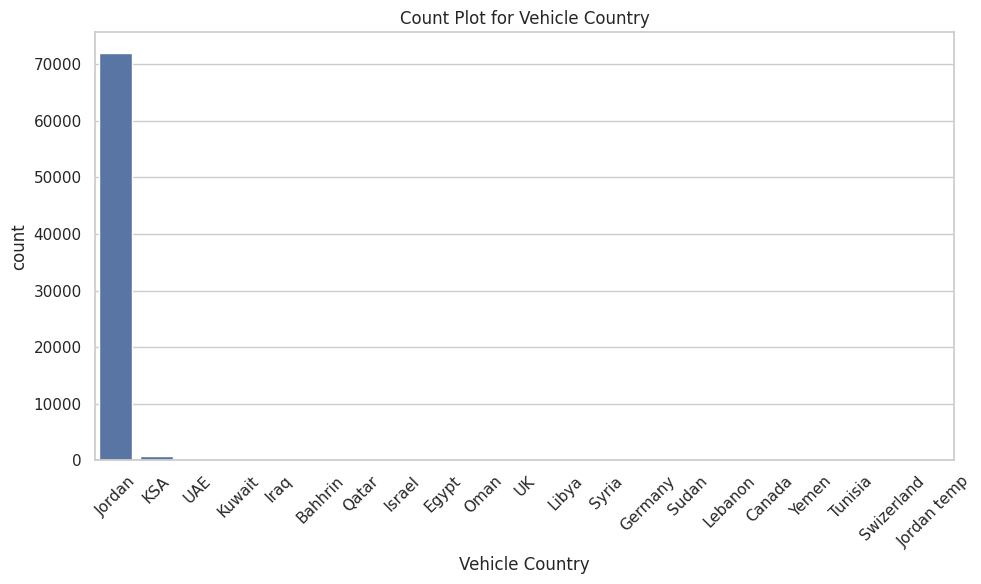

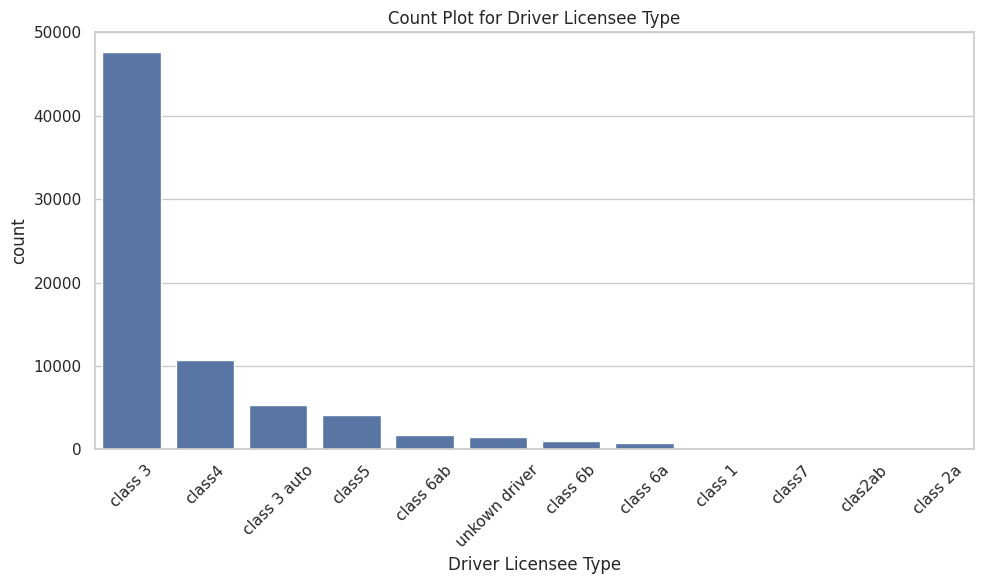

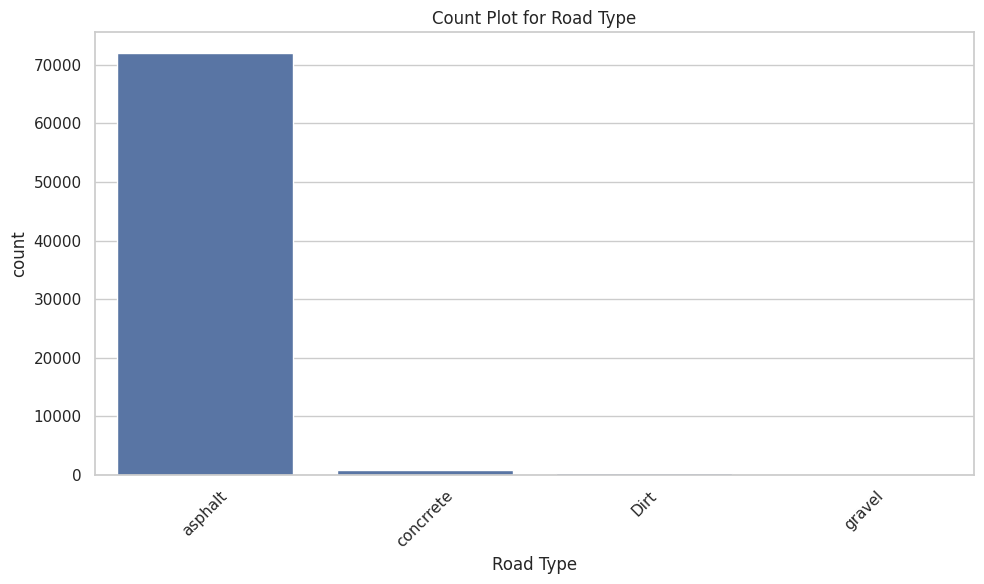

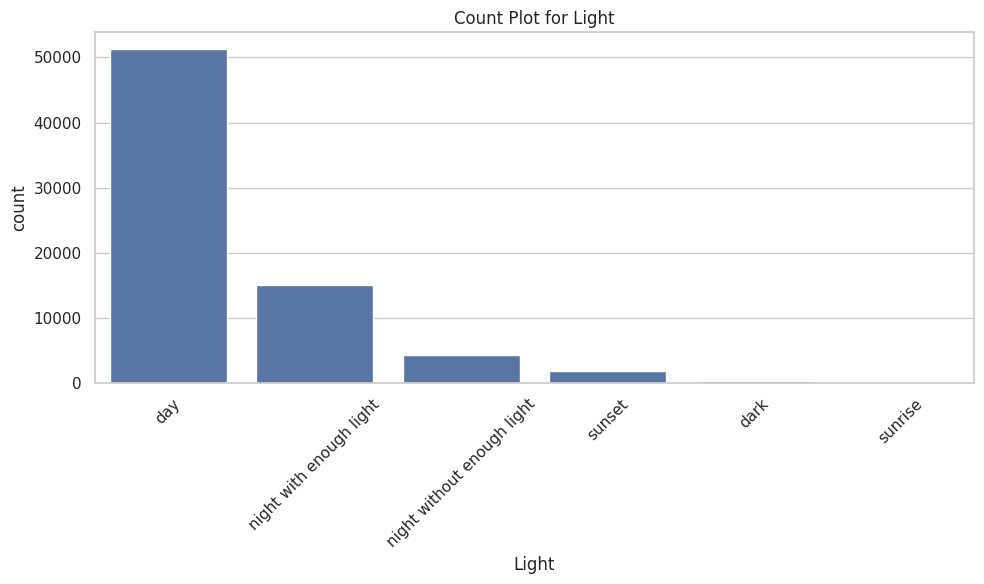

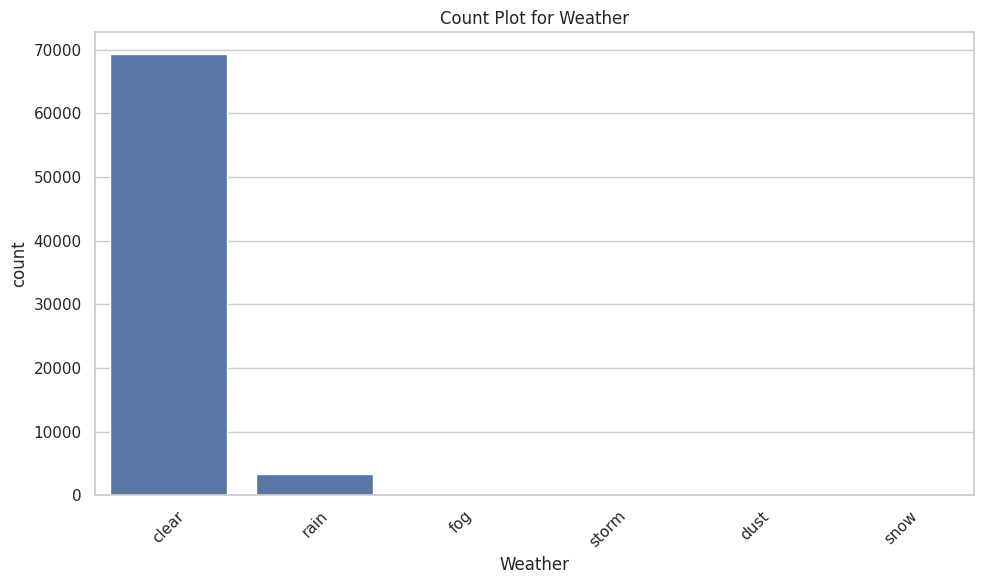

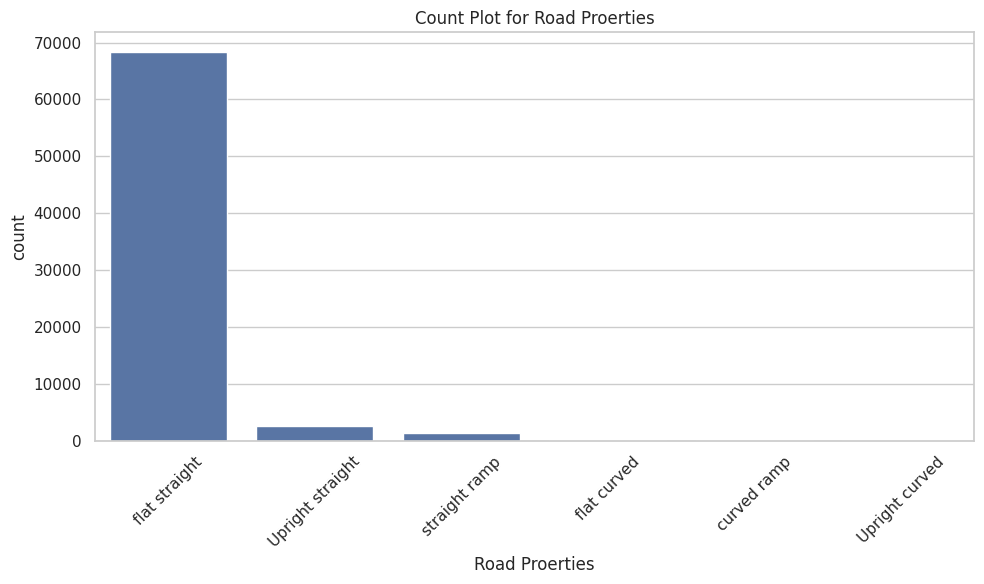

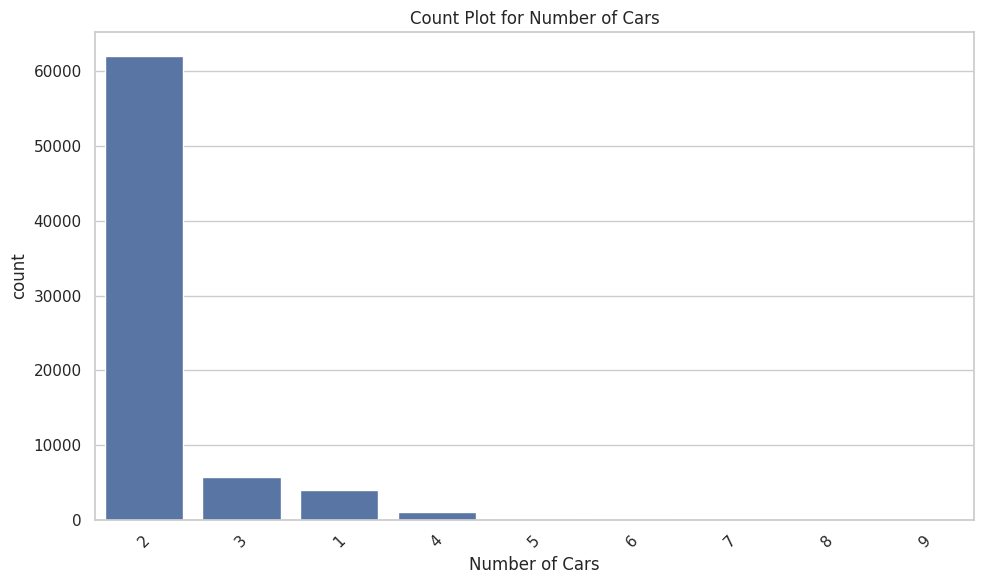

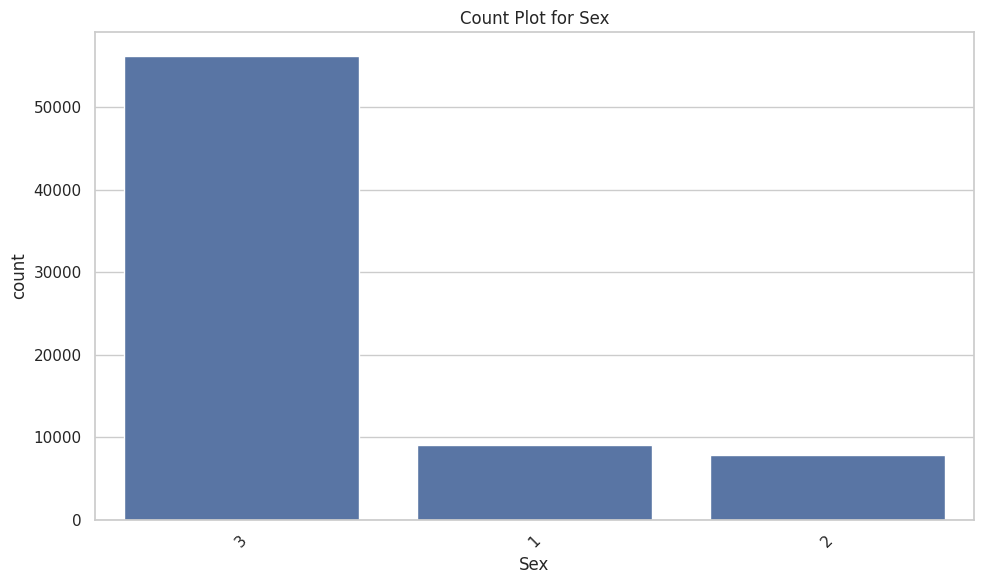

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

cat_columns = ['Accident Type', 'Speed (Km)', 'Road Lanes',
       'Road Surfuce Description', 'Vehicle Country', 'Driver Licensee Type',
       'Road Type', 'Light', 'Weather', 'Road Proerties', 'Number of Cars', 'Sex']
for col in cat_columns:
    plt.figure()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

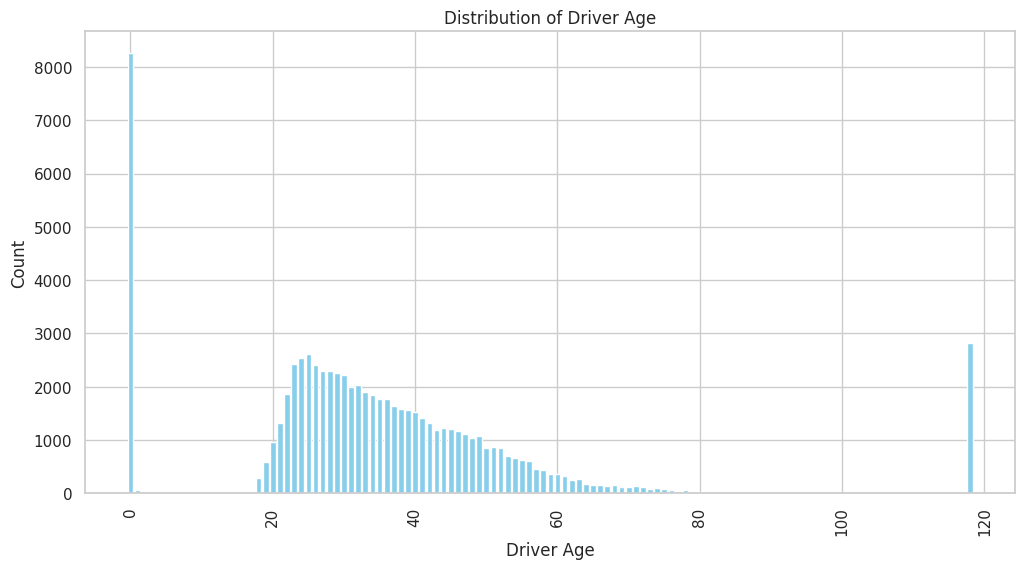

In [ ]:
age_counts = df["Driver Age"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
plt.bar(age_counts.index, age_counts.values, color="skyblue")
plt.xlabel("Driver Age")
plt.ylabel("Count")
plt.title("Distribution of Driver Age")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

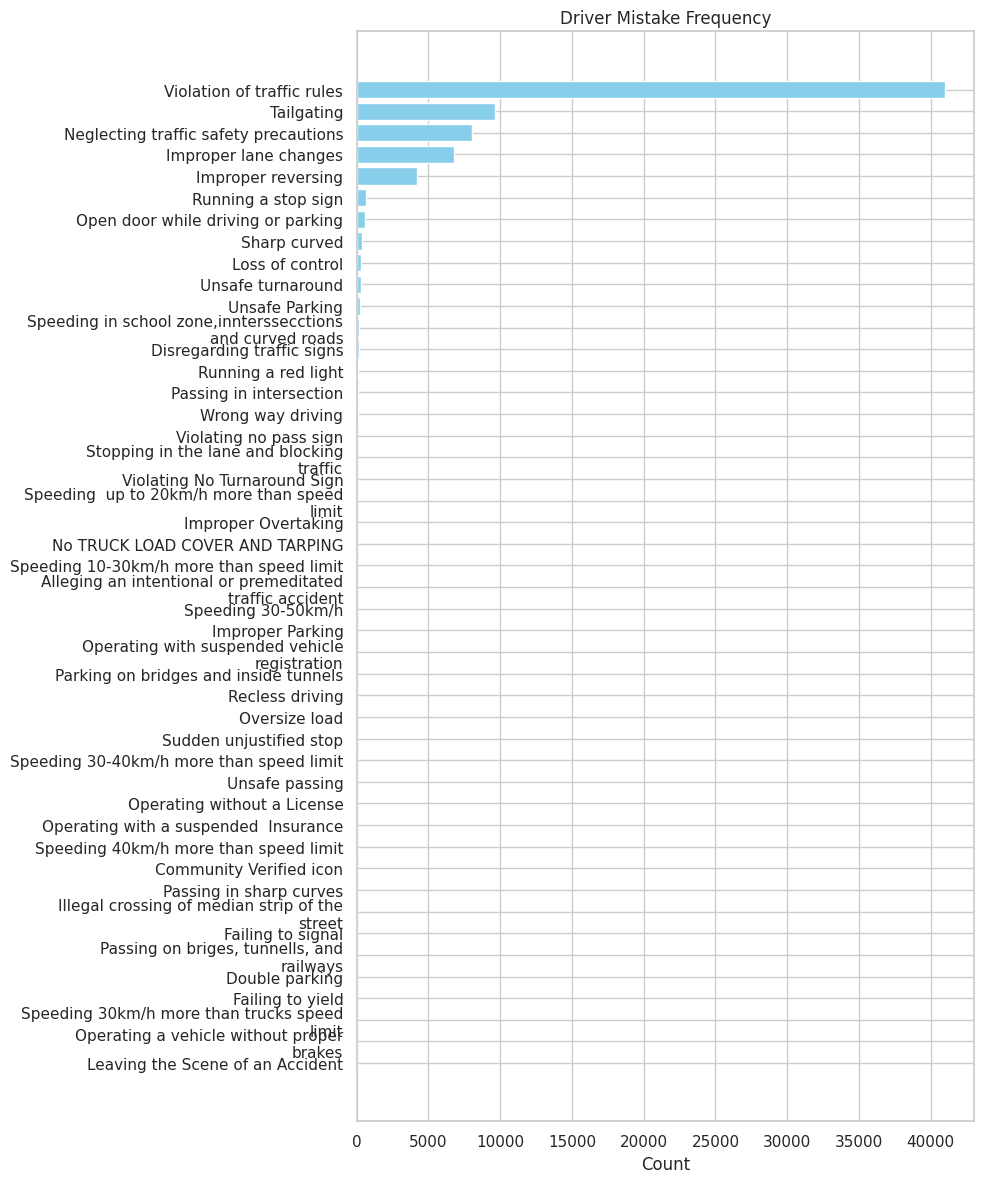

In [ ]:
# wrap long labels
def wrap_labels(labels, width=40):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

#  Driver Mistake
driver_counts = df["Driver Mistake"].value_counts()

labels = wrap_labels(driver_counts.index)

plt.figure(figsize=(10,12))
plt.barh(labels, driver_counts.values, color="skyblue")
plt.xlabel("Count")
plt.title("Driver Mistake Frequency")
plt.gca().invert_yaxis()  # Largest on top
plt.tight_layout()
plt.show()


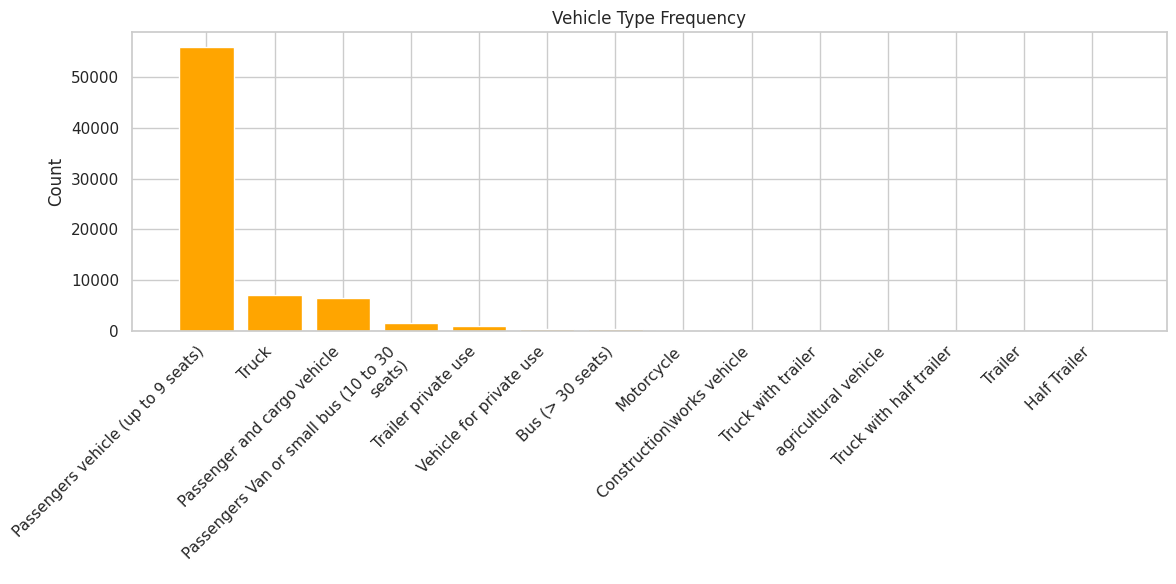

In [ ]:
#  Vehicle Type
vehicle_counts = df["Vehicle type"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(wrap_labels(vehicle_counts.index), vehicle_counts.values, color="orange")
plt.xticks(rotation=45, ha="right")
plt.title("Vehicle Type Frequency")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# drop the Date
if 'Date' in df.columns:
    df.drop(columns=['Date'], inplace=True)

In [ ]:
#  ages between 10 and 80
df = df[(df['Driver Age'] > 10) & (df['Driver Age'] <= 80)]

#  average
avg_age = df['Driver Age'].mean()

# 3. Fill missing values
df['Driver Age'] = df['Driver Age'].fillna(avg_age)

print(f"Average age used for filling: {avg_age:.2f}")


Average age used for filling: 36.42


/tmp/ipython-input-108097491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Driver Age'] = df['Driver Age'].fillna(avg_age)


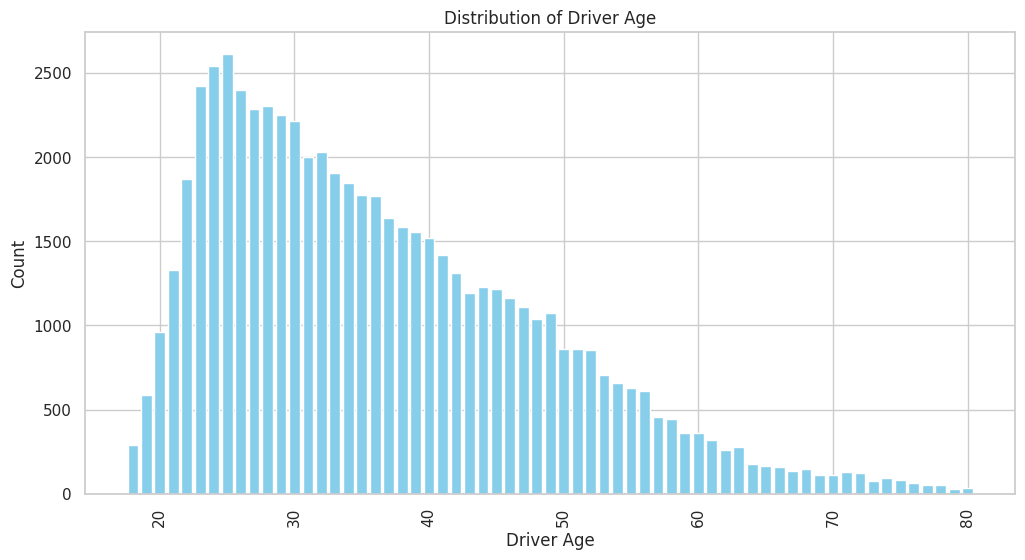

In [ ]:
# plot after remove outlayer
age_counts = df["Driver Age"].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
plt.bar(age_counts.index, age_counts.values, color="skyblue")
plt.xlabel("Driver Age")
plt.ylabel("Count")
plt.title("Distribution of Driver Age")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

In [ ]:
#  One-hot encode Accident Type to 0/1
df = pd.get_dummies(df, columns=['Accident Type'], prefix='Accident', dtype=int)


In [ ]:
# encode (Driver Mistake) Map to integers (Label Encoding)
if 'Driver Mistake' in df.columns:
    mistake_map = {name: idx for idx, name in enumerate(df['Driver Mistake'].unique())}
    df['Driver Mistake'] = df['Driver Mistake'].map(mistake_map)

In [ ]:
# encode (Road Surfuce Description) Map to integers (Label Encoding)
if 'Road Surfuce Description' in df.columns:
    df['Road Surfuce Description'] = df['Road Surfuce Description'].str.lower()

    surface_map = {
        'dry': 0,
        'wet': 1,
        'freeze': 2,
        'mud': 3,
        'snow': 4,
        'sandy': 5,
        'oily': 6
    }

    df['Road Surfuce Description'] = df['Road Surfuce Description'].map(surface_map).fillna(-1).astype(int)


In [ ]:
# encode (Road Type) Map to integers (Label Encoding)
if 'Road Type' in df.columns:
    df['Road Type'] = df['Road Type'].str.lower()

    road_type_map = {
        'asphalt': 0,
        'concrrete': 1,  # Keeping typo as in dataset
        'dirt': 2,
        'gravel': 3
    }

    df['Road Type'] = df['Road Type'].map(road_type_map).fillna(-1).astype(int)


In [ ]:
# map the Weather
if 'Weather' in df.columns:
    weather_map = {name: idx for idx, name in enumerate(df['Weather'].unique())}
    df['Weather'] = df['Weather'].map(weather_map)

In [ ]:
# drop Vehicle Country
if 'Vehicle Country' in df.columns:
    df = df.drop(columns=['Vehicle Country'])

In [ ]:
# one hot encode Road Proerties
if 'Road Proerties' in df.columns:
    df['Road Proerties'] = df['Road Proerties'].str.lower()
    df = pd.get_dummies(df, columns=['Road Proerties'], prefix='RoadProp', dtype=int)


In [ ]:
# Extracting the main class number
# Adding a small decimal based on the suffix (auto = .1, a = .2, b = .3, ab = .4)

if 'Driver Licensee Type' in df.columns:
    df['Driver Licensee Type'] = df['Driver Licensee Type'].str.lower()

    def encode_license_type(value):
        # Assign base number from digits, 0 if not found
        match = re.search(r'\d+', value)
        base = int(match.group()) if match else 0

        if 'auto' in value:
            base += 0.1
        elif value.endswith('a'):
            base += 0.2
        elif value.endswith('b'):
            base += 0.3
        elif 'ab' in value:
            base += 0.4

        return base

    df['Driver Licensee Type'] = df['Driver Licensee Type'].apply(encode_license_type)


In [ ]:
# drop Road Lanes
if 'Road Lanes' in df.columns:
    df.drop(columns=['Road Lanes'], inplace=True)

In [ ]:
if 'Light' in df.columns:
    df['Light'] = df['Light'].str.lower()

    light_map = {
        'day': 12,
        'sunrise': 6,
        'sunset': 18,
        'night with enough light': 21.5,
        'night without enough light': 21,
        'dark': 0
    }
    df['Light'] = df['Light'].map(light_map).fillna(-1)

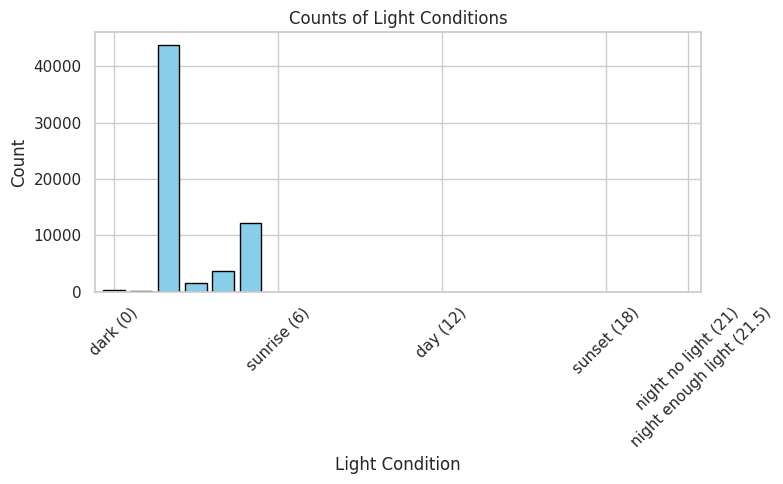

In [ ]:
# plot light after change
counts = df['Light'].value_counts().sort_index()

labels = ['dark (0)', 'sunrise (6)', 'day (12)', 'sunset (18)', 'night no light (21)', 'night enough light (21.5)']

plt.figure(figsize=(8,5))
plt.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')
plt.xticks(counts.index, labels, rotation=45)
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.title('Counts of Light Conditions')
plt.tight_layout()
plt.show()

In [ ]:
vehicle_type_map = {
    'passengers vehicle (up to 9 seats)': 100,
    'passenger and cargo vehicle': 200,
    'passengers van or small bus (10 to 30 seats)': 300,
    'bus (> 30 seats)': 400,
    'motorcycle': 10,
    'truck': 500,
    'truck with trailer': 550,
    'truck with half trailer': 530,
    'trailer private use': 600,
    'trailer': 620,
    'half trailer': 610,
    'construction\\works vehicle': 700,
    'vehicle for private use': 150,
    'agricultural vehicle': 800,
}

df['Vehicle type_clean'] = df['Vehicle type'].str.lower().str.strip()
df['Vehicle type_encoded'] = df['Vehicle type_clean'].map(vehicle_type_map).fillna(-1).astype(int)

print(df[['Vehicle type', 'Vehicle type_encoded']].head(20))


                                    Vehicle type  Vehicle type_encoded
0             Passengers vehicle (up to 9 seats)                   100
1             Passengers vehicle (up to 9 seats)                   100
2                                          Truck                   500
3             Passengers vehicle (up to 9 seats)                   100
4                    Passenger and cargo vehicle                   200
5             Passengers vehicle (up to 9 seats)                   100
6             Passengers vehicle (up to 9 seats)                   100
9                    Passenger and cargo vehicle                   200
10            Passengers vehicle (up to 9 seats)                   100
12            Passengers vehicle (up to 9 seats)                   100
13                   Passenger and cargo vehicle                   200
15                                         Truck                   500
16            Passengers vehicle (up to 9 seats)                   100
17    

In [ ]:
cols_to_drop = ['Vehicle type', 'Vehicle type_clean']
for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

In [ ]:
df.head(20)

,Speed (Km),Simple Injuries,Severe Injuries,Death,Medium Injuries,Road Surfuce Description,Driver Licensee Type,Road Type,Light,Weather,...,Accident_Collision,Accident_Off-Road,Accident_Run over,RoadProp_curved ramp,RoadProp_flat curved,RoadProp_flat straight,RoadProp_straight ramp,RoadProp_upright curved,RoadProp_upright straight,Vehicle type_encoded
0,60,0,0,0,0,0,3.0,0,12.0,0,...,1,0,0,0,0,1,0,0,0,100
1,60,0,0,0,0,0,3.0,0,12.0,0,...,1,0,0,0,0,1,0,0,0,100
2,40,0,0,0,0,0,4.0,0,21.5,0,...,1,0,0,0,0,1,0,0,0,500
3,40,0,0,0,0,0,3.0,0,21.5,0,...,1,0,0,0,0,1,0,0,0,100
4,100,0,0,0,0,0,4.0,0,21.5,0,...,1,0,0,0,0,1,0,0,0,200
5,100,0,0,0,0,0,3.0,0,21.5,0,...,1,0,0,0,0,1,0,0,0,100
6,50,0,0,0,0,0,6.3,0,12.0,0,...,1,0,0,0,0,1,0,0,0,100
9,40,0,0,0,0,0,3.0,0,12.0,0,...,1,0,0,0,0,0,0,0,1,200
10,60,0,0,0,0,1,3.1,0,21.5,0,...,1,0,0,0,0,0,1,0,0,100
12,60,0,0,0,0,1,4.0,0,21.5,0,...,1,0,0,0,0,0,1,0,0,100


In [ ]:
df.to_csv("cleaned_accidents.csv", index=False)